In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score as sil

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_7_clustering

09-07-2022  15:30    <DIR>          .
09-07-2022  15:30    <DIR>          ..
06-07-2022  18:55    <DIR>          .ipynb_checkpoints
09-07-2022  14:44           157,165 airlines.csv
09-07-2022  15:30           161,691 assignment9_clustering.ipynb
06-07-2022  19:01             1,334 crime_data.csv
09-07-2022  14:43           245,704 EastWestAirlines.xlsx
02-07-2022  09:18             1,560 Problem_Statement(Airlines).txt
02-07-2022  09:18               389 ProblemSatement(crime_data).txt
               6 File(s)        567,843 bytes
               3 Dir(s)  119,722,389,504 bytes free


# Q1

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [4]:
crime_df=pd.read_csv("crime_data.csv")
crime_df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
# Scaling the data
def get_norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [6]:
crime_df_norm=get_norm(crime_df.iloc[:,1:])

In [7]:
crime_df_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [128]:
# Finding Optimal number of clusters using Silhouette Score for heirarchical clustering

clusters=range(2,10)
sc_score=[]
for i in clusters:
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='single')
    y_hc=hc.fit_predict(crime_df_norm.iloc[:,:4])
    sc_score.append(sil(crime_df_norm.iloc[:,:4],y_hc))

In [129]:
sc_score

[0.21033337025958493,
 0.14223288708185458,
 -0.16741191954744025,
 -0.18215418215195153,
 -0.058198610679380175,
 -0.0034333764345219724,
 -0.01103044204030851,
 0.14313198214355022]

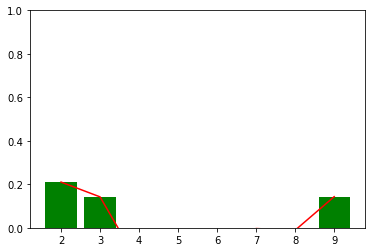

In [131]:
# Plotting 

plt.bar(clusters,sc_score,color='green')
plt.plot(clusters,sc_score,color='red')
plt.xticks(clusters)
plt.ylim(0,1)
plt.show()

In [ ]:
# Silhouette Score near to zero--> bad number of clusters
# Silhouette Score near to one --> good number of clusters
# From the Silhouette Score the optimal number of clusters is found to be "2"

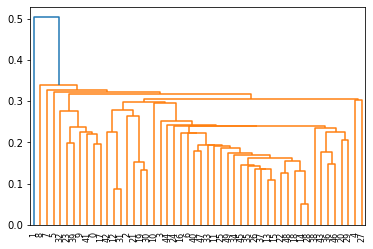

In [8]:
# Hierarchical Clustering
# Creating the dendrogram
dendrogram=sch.dendrogram(sch.linkage(crime_df_norm,method='single'))

In [9]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')
y_hc=hc.fit_predict(crime_df_norm)

In [10]:
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
crime_df['hc_clusterid']=y_hc
crime_df.head()

,States,Murder,Assault,UrbanPop,Rape,hc_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [12]:
crime_df.groupby(['hc_clusterid'])['States'].apply(lambda x:tuple(x))

hc_clusterid
0    (Alabama, Arizona, Arkansas, California, Color...
1                                            (Alaska,)
Name: States, dtype: object

In [121]:
crime_df.hc_clusterid.value_counts()

0    49
1     1
Name: hc_clusterid, dtype: int64

In [ ]:
# cluster 1 contributes 98% of the total data
# cluster 2 contributes only 2% of the total data

In [19]:
# KMEANS Clustering

df=pd.read_csv("crime_data.csv")
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
# Normalising the data
df_norm=get_norm(df.iloc[:,1:5])

In [21]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [132]:
# Silhouette Score for Kmeans

clusters=range(2,10)
sc_score=[]
for i in clusters:
    model=KMeans(n_clusters=i)
    y_km=model.fit_predict(df_norm)
    sc_score.append(sil(df_norm.iloc[:,1:5],y_km))

In [133]:
sc_score

[0.36468843671177326,
 0.28825943291973105,
 0.33469989585309085,
 0.2544428736953488,
 0.24596250850356116,
 0.23392430956871324,
 0.22045986823861935,
 0.23475320275543227]

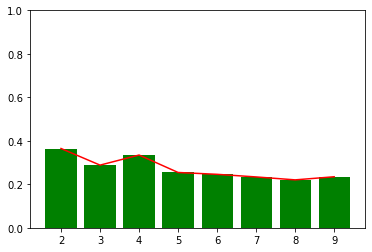

In [134]:
# Plotiing for better understanding

plt.bar(clusters,sc_score,color='green')
plt.plot(clusters,sc_score,color='red')
plt.xticks(clusters)
plt.ylim(0,1)
plt.show()

In [ ]:
# For KMEANS the highest Silhouette Score is 0.365 and it is for "2_clusters"
# From the Silhouette Score the optimal number of clusters is found to be "2"

In [62]:
# Elbow Method for KMEANS
clusters=range(2,15)
inertia=[]
for i in clusters:
    model=KMeans(n_clusters=i)
    y_km=model.fit_predict(df_norm)
    inertia.append(model.inertia_)

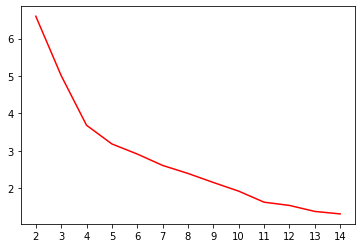

In [63]:
plt.plot(clusters,inertia,color='red')
plt.xticks(clusters)
plt.show()

In [ ]:
# From Elbow Method--> The optimal number of clusters are "4"

In [135]:
# KMEANS Model using n_clusters=4
model_km=KMeans(n_clusters=4)
y_km=model_km.fit_predict(df_norm)

In [136]:
df['cluster_id']=y_km
df.head()

,States,Murder,Assault,UrbanPop,Rape,Labels,cluster_id
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,0,1


In [137]:
df.groupby(['cluster_id'])['States'].apply(lambda x:tuple(x))

cluster_id
0    (Alabama, Arkansas, Georgia, Louisiana, Missis...
1    (Alaska, Arizona, California, Colorado, Florid...
2    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
3    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
Name: States, dtype: object

In [138]:
df.cluster_id.value_counts()

3    16
1    13
2    13
0     8
Name: cluster_id, dtype: int64

In [ ]:
# Cluster 0 contributes 16% of the total data
# Cluster 1 contributes 26% of the total data
# Cluster 2 contributes 26% of the total data
# Cluster 3 contributes 32% of the total data

In [30]:
# DBSCAN
df2=pd.read_csv("crime_data.csv")
df2.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [31]:
df2_norm=get_norm(df2.iloc[:,1:5])
df2_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [32]:
dbs=DBSCAN(min_samples=5,eps=0.3)
y_dbs=dbs.fit_predict(df2_norm)
y_dbs           

array([ 0, -1, -1,  1, -1, -1,  1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [33]:
# We are getting "3-clusters"--> -1, 0, 1 

In [34]:
df2['cluster_id']=y_dbs
df2.sample(10)

,States,Murder,Assault,UrbanPop,Rape,cluster_id
19,Maryland,11.3,300,67,27.8,-1
30,New Mexico,11.4,285,70,32.1,-1
28,New Hampshire,2.1,57,56,9.5,1
13,Indiana,7.2,113,65,21.0,1
6,Connecticut,3.3,110,77,11.1,1
46,Washington,4.0,145,73,26.2,1
2,Arizona,8.1,294,80,31.0,-1
27,Nevada,12.2,252,81,46.0,-1
11,Idaho,2.6,120,54,14.2,1
26,Nebraska,4.3,102,62,16.5,1


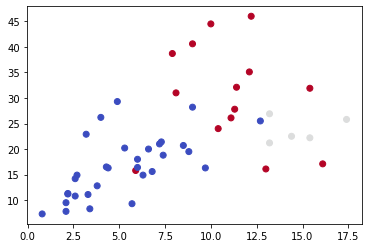

In [35]:
plt.scatter(df['Murder'],df['Rape'],c=y_dbs,cmap=plt.cm.coolwarm_r)

In [36]:
# Since DBSCAN is used only when we want to detect some kind of shape from the data, it will not be useful here.
# In this case the data is scattered and does not form any shape or structure.
# Hence it will be difficult to detect the number od clusters based on this method

# Q2 (Airlines Problem)

In [37]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_7_clustering

09-07-2022  15:30    <DIR>          .
09-07-2022  15:30    <DIR>          ..
06-07-2022  18:55    <DIR>          .ipynb_checkpoints
09-07-2022  14:44           157,165 airlines.csv
09-07-2022  15:30           161,691 assignment9_clustering.ipynb
06-07-2022  19:01             1,334 crime_data.csv
09-07-2022  14:43           245,704 EastWestAirlines.xlsx
02-07-2022  09:18             1,560 Problem_Statement(Airlines).txt
02-07-2022  09:18               389 ProblemSatement(crime_data).txt
               6 File(s)        567,843 bytes
               3 Dir(s)  119,722,381,312 bytes free


In [38]:
data=pd.read_csv("airlines.csv")
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [95]:
data.shape

(3999, 13)

In [39]:
# Scaling the data
def get_norm(i):
    return (i-i.min())/(i.max()-i.min())

In [40]:
# Not considering the ID and Award column from the data
data_norm=get_norm(data.iloc[:,1:-1])

In [41]:
data_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


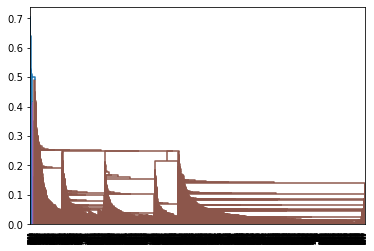

In [42]:
# Dendrogram
dendrogram=sch.dendrogram(sch.linkage(data_norm,method='single', metric='euclidean'))

In [43]:
# Heirarchical Clustering
model_hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')
y_hc=model_hc.fit_predict(data_norm)

In [44]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
clusters=range(2,10)
sc_score=[]
for i in clusters:
    model_hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='single')
    y_hc=model_hc.fit_predict(data_norm)
    sc_score.append(sil(data_norm,y_hc))

In [46]:
sc_score

[0.6626048712239866,
 0.3500610320368856,
 0.34845710526669593,
 0.3481223794633064,
 0.34607936863073946,
 0.21586598300650825,
 0.21989311696635605,
 0.12102373991382494]

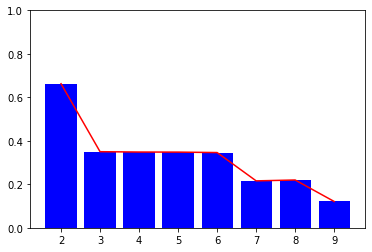

In [47]:
# Plotting for better understanding

plt.bar(clusters,sc_score,color='blue')
plt.plot(clusters,sc_score,color='red')
plt.xticks(clusters)
plt.ylim(0,1)
plt.show()

In [48]:
# The highest Silhouette score is for number of clusters=2
# Hence the Optimal number of cluster is equal to 2

In [112]:
# KMEANS Clustering

In [84]:
# Silhouette Score for KMEANS
clusters=range(2,15)
sc_score=[]
for i in clusters:
    model_km=KMeans(n_clusters=i)
    y_km=model_km.fit_predict(data_norm)
    sc_score.append(sil(data_norm,y_km))

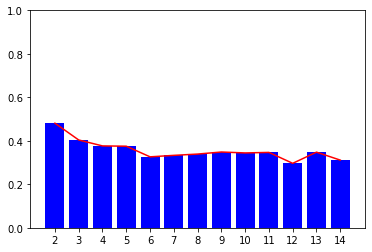

In [85]:
# Plotting for better visualization 

plt.bar(clusters,sc_score,color='blue')
plt.plot(clusters,sc_score,color='red')
plt.xticks(clusters)
plt.ylim(0,1)
plt.show()

In [86]:
# The highest Silhouette score is for number of clusters=2
# Hence the Optimal number of cluster is equal to 2

In [87]:
# Elbow Method for KMEANS

clusters=range(2,10)
inertia=[]
for i in clusters:
    model=KMeans(n_clusters=i)
    y_km=model.fit_predict(data_norm)
    inertia.append(model.inertia_)

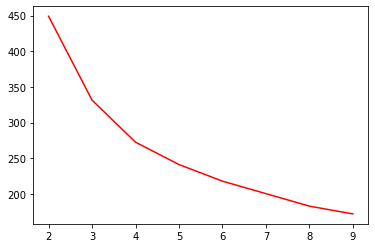

In [88]:
# Plotting for better visualization 

plt.plot(clusters,inertia,color='red')
plt.xticks(clusters)
plt.show()

In [ ]:
# From Elbow Method--> The optimal number of clusters are "4"

In [113]:
data_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [114]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [115]:
model_km=KMeans(n_clusters=4)
y_km=model_km.fit_predict(data_norm)

In [117]:
data['clusterid']=y_km
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [118]:
data.groupby(['clusterid'])['ID'].apply(lambda x: tuple(x))

clusterid
0    (5, 7, 9, 10, 12, 16, 17, 19, 20, 21, 29, 31, ...
1    (1141, 1445, 1564, 1566, 1567, 1568, 1569, 157...
2    (994, 1080, 1177, 1236, 1254, 1333, 1340, 1354...
3    (1, 2, 3, 4, 6, 8, 11, 13, 14, 15, 18, 22, 23,...
Name: ID, dtype: object

In [119]:
data.clusterid.value_counts()

1    1405
3    1168
0     747
2     679
Name: clusterid, dtype: int64

In [ ]:
# The clusters 1 and 3 have 35.134% and 29.21% of the total travellers.

In [53]:
# DBSCAN 
model_dbs=DBSCAN(min_samples=5,eps=0.5)
y_dbs=model_dbs.fit_predict(data_norm)
y_dbs

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
data['clusterid']=y_dbs
data.sample(10)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
1359,1372,46545,1000,1,1,1,0,0,0,0,5066,0,0
1586,1601,41048,0,1,1,1,1195,3,0,0,4856,0,0
3814,3837,71502,0,2,1,1,9482,13,0,0,1699,0,0
3762,3785,74531,0,1,2,1,10914,17,750,3,3456,1,2
1476,1491,190429,6168,1,1,1,27500,11,1500,3,4974,1,0
2852,2874,17603,2543,2,1,1,7247,14,0,0,1958,1,0
3166,3188,65460,0,1,1,1,0,0,0,0,2493,0,0
1798,1815,12560,0,1,1,1,1282,6,1282,6,4324,1,0
3947,3970,45533,0,2,1,1,12247,20,0,0,1486,0,0
913,924,23390,0,1,1,1,1650,3,150,1,5958,0,0


In [55]:
data.groupby(['clusterid'])['ID'].apply(lambda x:tuple(x))

clusterid
-1     (2032, 2694, 2862, 2977, 3257, 3361, 3606, 3617)
 0    (1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 1...
 1    (202, 386, 951, 1283, 1808, 1935, 2064, 2183, ...
 2    (9, 230, 398, 568, 804, 1161, 1397, 1403, 1542...
Name: ID, dtype: object

In [56]:
# Using DBSCAN we are getting "4 clusters"--> -1,0,1,2

In [57]:
# Since DBSCAN is used only when we want to detect some kind of shape from the data, it will not be useful here.
# In this case the data is scattered and does not form any shape or structure.
# Hence it will be difficult to detect the number od clusters based on this method